In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **Loading Data**

In [3]:
from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


In [4]:
data = pd.read_csv("CarPrice_Assignment.csv")

In [5]:
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [10]:
len(data)

205

**Checking for Null in Dataset**

In [11]:
data.isnull().any()

car_ID              False
symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

# **Removing and seprating labels**

In [12]:
del data['car_ID']
labels = data.pop('price')
labels.astype('int16')
data.loc[3,'CarName'] = 'audi 100ls'

# **Checking objects datatypes in dataframe**

In [13]:
data_with_object_dtype = data.dtypes[data.dtypes == 'object']
data_with_object_dtype = list(data_with_object_dtype.keys())
data_with_object_dtype

['CarName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

## **One Hot Encode and vertorizing**

In [14]:
New_data = pd.get_dummies(data, columns=data_with_object_dtype)

In [15]:
New_data.iloc[:,1:14] -= (New_data.iloc[:,1:14]).mean()
New_data.iloc[:,1:14] /= (New_data.iloc[:,1:14]).std()
New_data.iloc[:,1:14]

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,-1.686643,-0.425480,-0.842719,-2.015483,-0.014531,0.074267,0.517804,-1.834886,-0.287645,0.174057,-0.262318,-0.644974,-0.544725
1,-1.686643,-0.425480,-0.842719,-2.015483,-0.014531,0.074267,0.517804,-1.834886,-0.287645,0.174057,-0.262318,-0.644974,-0.544725
2,-0.706865,-0.230948,-0.190101,-0.542200,0.513625,0.602571,-2.399008,0.684271,-0.287645,1.261448,-0.262318,-0.950684,-0.689938
3,0.173274,0.206750,0.136209,0.235366,-0.419770,-0.430023,-0.516003,0.461055,-0.035885,-0.053537,0.785932,-0.186409,-0.109087
4,0.106848,0.206750,0.229440,0.235366,0.515545,0.218350,-0.516003,0.461055,-0.539405,0.275209,0.785932,-1.103540,-1.270789
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.717669,1.195622,1.394830,0.726460,0.761377,0.338419,1.662375,-0.336147,-0.161765,0.249921,0.576282,-0.339264,-0.399512
201,1.717669,1.195622,1.348215,0.726460,0.947672,0.338419,1.662375,-0.336147,-0.363173,1.413178,0.366632,-0.950684,-0.835151
202,1.717669,1.195622,1.394830,0.726460,0.876611,1.106861,0.923942,-1.229012,-0.337997,0.755685,0.785932,-1.103540,-1.125577
203,1.717669,1.195622,1.394830,0.726460,1.270327,0.434474,-1.180593,0.461055,3.236992,0.047616,-0.681618,0.119302,-0.544725


In [16]:
data_len = len(New_data)
train_data = New_data.iloc[:data_len*70//100]
test_data = New_data.iloc[data_len*70//100:]

labels_len = len(labels)
train_labels = labels.iloc[:labels_len*70//100]
test_labels = labels.iloc[labels_len*70//100:]

In [17]:
New_data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,CarName_Nissan versa,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,CarName_bmw x1,CarName_bmw x3,CarName_bmw x4,CarName_bmw x5,CarName_bmw z4,CarName_buick century,CarName_buick century luxus (sw),CarName_buick century special,CarName_buick electra 225 custom,CarName_buick opel isuzu deluxe,CarName_buick regal sport coupe (turbo),CarName_buick skyhawk,CarName_buick skylark,CarName_chevrolet impala,CarName_chevrolet monte carlo,CarName_chevrolet vega 2300,...,CarName_vw dasher,CarName_vw rabbit,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginelocation_front,enginelocation_rear,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
count,205.000000,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,-2.017898e-14,-1.011440e-14,1.431700e-14,-1.499613e-14,1.261863e-16,4.034713e-17,-5.910719e-15,1.766473e-14,-5.315531e-16,1.775003e-16,3.103209e-16,1.223953e-16,1.792604e-16,0.004878,0.004878,0.004878,0.004878,0.014634,0.004878,0.004878,0.004878,0.004878,0.009756,0.004878,0.009756,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,0.004878,...,0.004878,0.004878,0.097561,0.902439,0.819512,0.180488,0.560976,0.439024,0.029268,0.039024,0.341463,0.468293,0.121951,0.043902,0.585366,0.370732,0.985366,0.014634,0.058537,0.004878,0.058537,0.721951,0.073171,0.063415,0.019512,0.024390,0.053659,0.775610,0.117073,0.004878,0.004878,0.019512,0.053659,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878
std,1.245307,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.069843,0.069843,0.069843,0.069843,0.120377,0.069843,0.069843,0.069843,0.069843,0.098531,0.069843,0.098531,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,0.069843,...,0.069843,0.069843,0.297446,0.297446,0.385535,0.385535,0.497483,0.497483,0.168970,0.194127,0.475361,0.500215,0.328031,0.205380,0.493865,0.484183,0.120377,0.120377,0.235330,0.069843,0.235330,0.449134,0.261054,0.244304,0.138655,0.154635,0.225894,0.418201,0.322294,0.069843,0.069843,0.138655,0.225894,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843
min,-2.000000,-2.018771e+00,-2.670706e+00,-2.614113e+00,-2.424729e+00,-2.05032

In [18]:
from tensorflow.keras import models
from tensorflow.keras import layers
def Train_Me_with(activation_function="relu"):
  network = models.Sequential()
  network.add(layers.Dense(24, activation=activation_function,input_shape=(train_data.shape[1],)))
  network.add(layers.Dense(18, activation=activation_function))
  network.add(layers.Dense(12, activation=activation_function))
  network.add(layers.Dense(1))
  network.compile(
      optimizer="rmsprop",
      loss="mse",
      metrics=['mae']
  )
  return network

# **MAE without K fold and with tanh**

In [19]:
Model_Results1 = Train_Me_with(activation_function="tanh").fit(
      train_data,train_labels,batch_size=32,epochs=500,validation_data=(test_data,test_labels)
  )

Epoch 1/500
5/5 [==============================] - 4s 94ms/step - loss: 285903440.0000 - mae: 14230.6982 - val_loss: 146548528.0000 - val_mae: 11350.4629
Epoch 2/500
5/5 [==============================] - 0s 11ms/step - loss: 289909909.3333 - mae: 14225.8162 - val_loss: 146536144.0000 - val_mae: 11349.9453
Epoch 3/500
5/5 [==============================] - 0s 9ms/step - loss: 283114752.0000 - mae: 14169.6258 - val_loss: 146526640.0000 - val_mae: 11349.5352
Epoch 4/500
5/5 [==============================] - 0s 9ms/step - loss: 296333066.6667 - mae: 14674.7074 - val_loss: 146519168.0000 - val_mae: 11349.2090
Epoch 5/500
5/5 [==============================] - 0s 13ms/step - loss: 256148562.6667 - mae: 13686.4647 - val_loss: 146513008.0000 - val_mae: 11348.9336
Epoch 6/500
5/5 [==============================] - 0s 10ms/step - loss: 301723394.6667 - mae: 14506.9883 - val_loss: 146507808.0000 - val_mae: 11348.6943
Epoch 7/500
5/5 [==============================] - 0s 11ms/step - loss: 277018

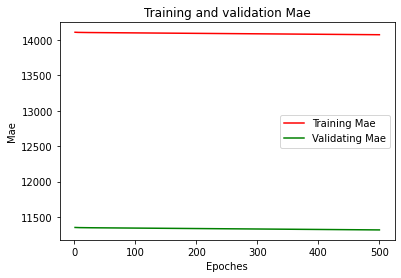

In [20]:
history_dict = Model_Results1.history
mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']
epoches = np.arange(1,len(history_dict['mae'])+1)
plt.plot(epoches,mae_values,'r',label="Training Mae")
plt.plot(epoches,val_mae_values,'g',label="Validating Mae")
plt.title('Training and validation Mae')
plt.xlabel("Epoches")
plt.ylabel("Mae")
plt.legend()
plt.show()

In [21]:
history_dict = Model_Results1.history
val_acc_values = history_dict['val_mae']
maxi = np.max(val_acc_values)
mini = np.min(val_acc_values)
avrg = (maxi+mini)/2
print(f"FOR MODEL1 Average Validation Absolute Error = {avrg}")

FOR MODEL1 Average Validation Absolute Error = 11333.08642578125


# **MAE without K fold and with selu**

In [22]:
Model_Results2 = Train_Me_with(activation_function="selu").fit(
      train_data,train_labels,batch_size=20,epochs=500,validation_data=(test_data,test_labels)
  )

Epoch 1/500
8/8 [==============================] - 1s 34ms/step - loss: 289106211.5556 - mae: 14328.1742 - val_loss: 146517312.0000 - val_mae: 11349.2373
Epoch 2/500
8/8 [==============================] - 0s 7ms/step - loss: 258147255.1111 - mae: 13362.6207 - val_loss: 146488128.0000 - val_mae: 11347.9229
Epoch 3/500
8/8 [==============================] - 0s 7ms/step - loss: 301819260.4444 - mae: 14650.1109 - val_loss: 146462880.0000 - val_mae: 11346.7783
Epoch 4/500
8/8 [==============================] - 0s 7ms/step - loss: 298500227.5556 - mae: 14576.8304 - val_loss: 146435184.0000 - val_mae: 11345.5625
Epoch 5/500
8/8 [==============================] - 0s 7ms/step - loss: 268701564.4444 - mae: 13804.2567 - val_loss: 146400480.0000 - val_mae: 11344.0879
Epoch 6/500
8/8 [==============================] - 0s 7ms/step - loss: 264720645.3333 - mae: 13792.0420 - val_loss: 146363536.0000 - val_mae: 11342.4971
Epoch 7/500
8/8 [==============================] - 0s 8ms/step - loss: 294982074.

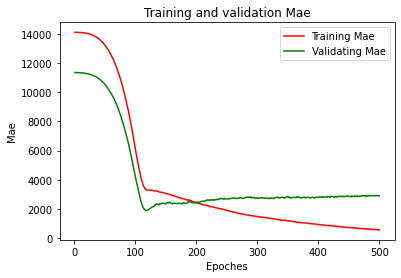

In [23]:
history_dict = Model_Results2.history
mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']
epoches = np.arange(1,len(history_dict['mae'])+1)
plt.plot(epoches,mae_values,'r',label="Training Mae")
plt.plot(epoches,val_mae_values,'g',label="Validating Mae")
plt.title('Training and validation Mae')
plt.xlabel("Epoches")
plt.ylabel("Mae")
plt.legend()
plt.show()

In [24]:
history_dict = Model_Results2.history
val_acc_values = history_dict['val_mae']
maxi = np.max(val_acc_values)
mini = np.min(val_acc_values)
avrg = (maxi+mini)/2
print(f"FOR MODEL1 Average Validation Absolute Error = {avrg}")

FOR MODEL1 Average Validation Absolute Error = 6619.280029296875


# **MAE without K fold and with gelu**

In [25]:
Model_Results3 = Train_Me_with(activation_function="gelu").fit(
      train_data,train_labels,batch_size=20,epochs=500,validation_data=(test_data,test_labels)
  )

Epoch 1/500
8/8 [==============================] - 1s 38ms/step - loss: 285117532.4444 - mae: 14159.2065 - val_loss: 146566592.0000 - val_mae: 11351.2695
Epoch 2/500
8/8 [==============================] - 0s 7ms/step - loss: 280125301.3333 - mae: 14116.0660 - val_loss: 146560704.0000 - val_mae: 11351.0410
Epoch 3/500
8/8 [==============================] - 0s 8ms/step - loss: 298803484.4444 - mae: 14584.7168 - val_loss: 146552976.0000 - val_mae: 11350.7393
Epoch 4/500
8/8 [==============================] - 0s 8ms/step - loss: 274249315.5556 - mae: 13929.5948 - val_loss: 146542176.0000 - val_mae: 11350.3193
Epoch 5/500
8/8 [==============================] - 0s 9ms/step - loss: 255515159.1111 - mae: 13683.8050 - val_loss: 146529760.0000 - val_mae: 11349.8291
Epoch 6/500
8/8 [==============================] - 0s 7ms/step - loss: 264177768.8889 - mae: 13827.3934 - val_loss: 146512368.0000 - val_mae: 11349.1543
Epoch 7/500
8/8 [==============================] - 0s 8ms/step - loss: 273431909.

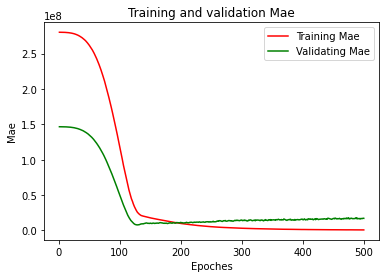

In [26]:
history_dict = Model_Results3.history
mae_values = history_dict['loss']
val_mae_values = history_dict['val_loss']
epoches = np.arange(1,len(history_dict['mae'])+1)
plt.plot(epoches,mae_values,'r',label="Training Mae")
plt.plot(epoches,val_mae_values,'g',label="Validating Mae")
plt.title('Training and validation Mae')
plt.xlabel("Epoches")
plt.ylabel("Mae")
plt.legend()
plt.show()

In [27]:
history_dict = Model_Results3.history
val_acc_values = history_dict['val_mae']
maxi = np.max(val_acc_values)
mini = np.min(val_acc_values)
avrg = (maxi+mini)/2
print(f"FOR MODEL1 Average Validation Absolute Error = {avrg}")

FOR MODEL1 Average Validation Absolute Error = 6734.6856689453125


# **MAE without K fold and with relu**

In [28]:
Model_Results4 = Train_Me_with(activation_function="relu").fit(
      train_data,train_labels,batch_size=20,epochs=500,validation_data=(test_data,test_labels)
  )

Epoch 1/500
8/8 [==============================] - 1s 31ms/step - loss: 252162622.2222 - mae: 13469.3167 - val_loss: 146566144.0000 - val_mae: 11351.2012
Epoch 2/500
8/8 [==============================] - 0s 8ms/step - loss: 254405998.2222 - mae: 13584.1366 - val_loss: 146559936.0000 - val_mae: 11350.9199
Epoch 3/500
8/8 [==============================] - 0s 7ms/step - loss: 241502316.4444 - mae: 13099.2630 - val_loss: 146550432.0000 - val_mae: 11350.5098
Epoch 4/500
8/8 [==============================] - 0s 7ms/step - loss: 271994584.8889 - mae: 13925.0264 - val_loss: 146538592.0000 - val_mae: 11349.9980
Epoch 5/500
8/8 [==============================] - 0s 7ms/step - loss: 282560464.0000 - mae: 14119.1910 - val_loss: 146522592.0000 - val_mae: 11349.3145
Epoch 6/500
8/8 [==============================] - 0s 7ms/step - loss: 317277863.1111 - mae: 15058.6993 - val_loss: 146505920.0000 - val_mae: 11348.6025
Epoch 7/500
8/8 [==============================] - 0s 7ms/step - loss: 242725370.

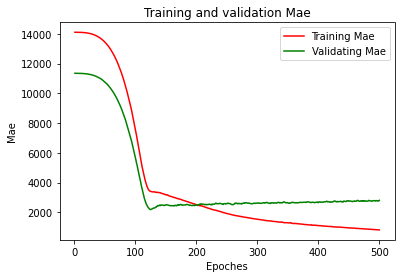

In [29]:
history_dict = Model_Results4.history
mae_values = history_dict['mae']
val_mae_values = history_dict['val_mae']
epoches = np.arange(1,len(history_dict['mae'])+1)
plt.plot(epoches,mae_values,'r',label="Training Mae")
plt.plot(epoches,val_mae_values,'g',label="Validating Mae")
plt.title('Training and validation Mae')
plt.xlabel("Epoches")
plt.ylabel("Mae")
plt.legend()
plt.show()

In [30]:
history_dict = Model_Results4.history
val_acc_values = history_dict['val_mae']
maxi = np.max(val_acc_values)
mini = np.min(val_acc_values)
avrg = (maxi+mini)/2
print(f"FOR MODEL1 Average Validation Absolute Error = {avrg}")

FOR MODEL1 Average Validation Absolute Error = 6768.7042236328125


# **MAE with K fold and with relu**

In [32]:
k =  4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores_relu = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],  axis=0)
  partial_train_targets = np.concatenate([train_labels[:i * num_val_samples],train_labels[(i + 1) * num_val_samples:]],axis=0)
  model = Train_Me_with('relu')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_relu.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


# **MAE with K fold and with gelu**

In [33]:
k =  4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores_gelu = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],  axis=0)
  partial_train_targets = np.concatenate([train_labels[:i * num_val_samples],train_labels[(i + 1) * num_val_samples:]],axis=0)
  model = Train_Me_with('gelu')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_gelu.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


# **MAE with K fold and with selu**

In [ ]:
k =  4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores_selu = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],  axis=0)
  partial_train_targets = np.concatenate([train_labels[:i * num_val_samples],train_labels[(i + 1) * num_val_samples:]],axis=0)
  model = Train_Me_with('selu')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_selu.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


# **MAE with K fold and with tanh**

In [34]:
k =  4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores_tanh = []
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],  axis=0)
  partial_train_targets = np.concatenate([train_labels[:i * num_val_samples],train_labels[(i + 1) * num_val_samples:]],axis=0)
  model = Train_Me_with('tanh')
  model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_tanh.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


# **Averages**

In [ ]:
print(f"Using activation function relu {np.average(all_scores_relu)}")
print(f"Using activation function tanh {np.average(all_scores_tanh)}")
print(f"Using activation function gelu {np.average(all_scores_gelu)}")
print(f"Using activation function selu {np.average(all_scores_selu)}")

Using activation function relu 2615.3230895996094
Using activation function tanh 14131.87890625
Using activation function gelu 2685.805450439453
Using activation function selu 2792.7562561035156


# **So Outcome of after all struggle**

Relu functions give better results amoung all other //\\\ Now paying with epochs

In [ ]:
k =  4
num_val_samples = len(train_data) // k
num_epochs = 200
all_scores_K_relu = []
model = Train_Me_with('relu')
for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
  partial_train_data = np.concatenate([train_data[:i * num_val_samples],train_data[(i + 1) * num_val_samples:]],  axis=0)
  partial_train_targets = np.concatenate([train_labels[:i * num_val_samples],train_labels[(i + 1) * num_val_samples:]],axis=0)
  Model_Results = model.fit(partial_train_data, partial_train_targets,epochs = num_epochs, batch_size=1,verbose=0)
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
  all_scores_K_relu.append(val_mae)
  history_dict = Model_Results.history
  mae_values = history_dict['mae']
print(f"On Eveluation Average using RELU and having {num_epochs} epoches is {np.average(all_scores_K_relu)}")

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
On Eveluation Average using RELU and having 200 epoches is 1451.5171813964844


# **Prediction obtained**

In [ ]:
Predicted_val = model.predict(test_data)

In [ ]:
y_pred = Predicted_val.flatten()
y_true = test_labels


(500.0, 30000.0)

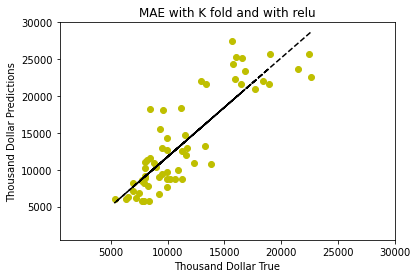

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
coef = np.polyfit(y_true,y_pred,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y
plt.figure()
plt.plot(y_true,y_pred, 'yo', y_true, poly1d_fn(y_true), '--k')
plt.title('MAE with K fold and with relu')
plt.xlabel('Thousand Dollar True' )
plt.ylabel('Thousand Dollar Predictions' )
plt.xlim(500, 30000)
plt.ylim(500, 30000)

In [ ]:
print(f"AT LEAST FIND On Eveluation Average using RELU is {np.average(all_scores_K_relu)}")

On Eveluation Average using RELU is 1451.5171813964844
